In [3]:
# Echo state network
# Vanilla RNN
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)

# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

# Forward pass
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], axis=1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


New data, epoch 0
Step 0 Loss 0.942064
Step 100 Loss 0.69299
Step 200 Loss 0.595648
Step 300 Loss 0.0348217
Step 400 Loss 0.00978851
Step 500 Loss 0.00503672
Step 600 Loss 0.0042214
New data, epoch 1
Step 0 Loss 0.127652
Step 100 Loss 0.00255848
Step 200 Loss 0.00189209
Step 300 Loss 0.00193189
Step 400 Loss 0.001555
Step 500 Loss 0.00162303
Step 600 Loss 0.0012203
New data, epoch 2
Step 0 Loss 0.16992
Step 100 Loss 0.00268344
Step 200 Loss 0.0019602
Step 300 Loss 0.00152672
Step 400 Loss 0.00109017
Step 500 Loss 0.000985877
Step 600 Loss 0.000935189
New data, epoch 3
Step 0 Loss 0.125668
Step 100 Loss 0.000748594
Step 200 Loss 0.000740393
Step 300 Loss 0.000528597
Step 400 Loss 0.000643036
Step 500 Loss 0.00052366
Step 600 Loss 0.00064173
New data, epoch 4
Step 0 Loss 0.160181
Step 100 Loss 0.000462203
Step 200 Loss 0.000486715
Step 300 Loss 0.000441569
Step 400 Loss 0.000437143
Step 500 Loss 0.000409899
Step 600 Loss 0.000351774
New data, epoch 5
Step 0 Loss 0.149514
Step 100 Loss 0.

Step 100 Loss 6.84497e-05
Step 200 Loss 5.77021e-05
Step 300 Loss 6.53063e-05
Step 400 Loss 6.92457e-05
Step 500 Loss 3.93266e-05
Step 600 Loss 4.85027e-05
New data, epoch 43
Step 0 Loss 0.267133
Step 100 Loss 4.84191e-05
Step 200 Loss 3.66391e-05
Step 300 Loss 4.23607e-05
Step 400 Loss 4.38501e-05
Step 500 Loss 4.37066e-05
Step 600 Loss 3.4848e-05
New data, epoch 44
Step 0 Loss 0.162935
Step 100 Loss 4.59475e-05
Step 200 Loss 4.36147e-05
Step 300 Loss 3.65421e-05
Step 400 Loss 5.37287e-05
Step 500 Loss 4.42566e-05
Step 600 Loss 4.01307e-05
New data, epoch 45
Step 0 Loss 0.138886
Step 100 Loss 5.3668e-05
Step 200 Loss 4.78239e-05
Step 300 Loss 4.31903e-05
Step 400 Loss 4.28057e-05
Step 500 Loss 3.52356e-05
Step 600 Loss 4.56581e-05
New data, epoch 46
Step 0 Loss 0.0973465
Step 100 Loss 6.18259e-05
Step 200 Loss 6.55377e-05
Step 300 Loss 5.16437e-05
Step 400 Loss 4.70012e-05
Step 500 Loss 4.26959e-05
Step 600 Loss 4.28881e-05
New data, epoch 47
Step 0 Loss 0.234368
Step 100 Loss 4.97601

Step 100 Loss 2.33948e-05
Step 200 Loss 2.33804e-05
Step 300 Loss 2.50015e-05
Step 400 Loss 2.2012e-05
Step 500 Loss 2.51363e-05
Step 600 Loss 2.67889e-05
New data, epoch 85
Step 0 Loss 0.280152
Step 100 Loss 2.8255e-05
Step 200 Loss 3.63139e-05
Step 300 Loss 2.36427e-05
Step 400 Loss 2.71487e-05
Step 500 Loss 3.18455e-05
Step 600 Loss 2.17624e-05
New data, epoch 86
Step 0 Loss 0.139983
Step 100 Loss 2.25459e-05
Step 200 Loss 2.3746e-05
Step 300 Loss 2.34058e-05
Step 400 Loss 2.17116e-05
Step 500 Loss 2.07802e-05
Step 600 Loss 2.06308e-05
New data, epoch 87
Step 0 Loss 0.145119
Step 100 Loss 2.48093e-05
Step 200 Loss 2.25397e-05
Step 300 Loss 2.35982e-05
Step 400 Loss 2.78763e-05
Step 500 Loss 2.54307e-05
Step 600 Loss 2.39622e-05
New data, epoch 88
Step 0 Loss 0.106407
Step 100 Loss 2.5348e-05
Step 200 Loss 2.39033e-05
Step 300 Loss 2.67101e-05
Step 400 Loss 2.33104e-05
Step 500 Loss 2.07707e-05
Step 600 Loss 2.43626e-05
New data, epoch 89
Step 0 Loss 0.158865
Step 100 Loss 2.32677e-0

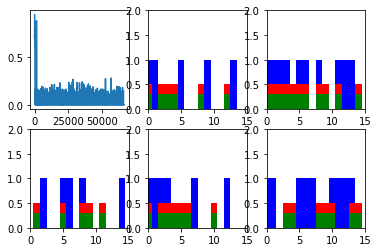

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()